In [1]:
from __future__ import division, print_function, unicode_literals
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from more_itertools import numeric_range

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
rc('text', usetex = True)
rc('font', family='serif')

## Get the data from spambase.data

In [2]:
df = pd.read_csv('spambase.data', sep=',', header=None)
df = df.rename(columns={df.columns[-1]: 'Spam'})
print(df.shape)
df.head()

(4601, 58)


0     1     2    3     4     5     6     7     8     9  ...     48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...   0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...   0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...   0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0.00   

      49   50     51     52     53     54   55    56  Spam  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278     1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028     1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259     1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191     1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191     1  

[5 rows x 58 columns]

## For the training data, take out $2/3$ instances labeled as spam and $2/3$ instances labeled as non-spams. Rest are considered as test data.

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)

spams = df [df.Spam == 1]
non_spams = df [df.Spam == 0]

train = spams.iloc [:(2 * len(spams)) // 3].append(non_spams.iloc 
                                                   [:(2 * len(non_spams)) // 3])
test = spams.iloc [(2 * len(spams)) // 3:].append (non_spams.iloc 
                                                   [(2 * len(non_spams)) // 3:])

train = shuffle(train)
test = shuffle(test)

print ('shape of train: ', train.shape)
print ('shape of test: ', test.shape)

shape of train:  (3066, 58)
shape of test:  (1535, 58)


### Sigmoid Function:

In [4]:
def sigmoid (z):
    return 1. / (1. + np.exp(-z))

### $y$ prediction based on the user-defined threshold $0.5$:

In [5]:
def predict_y (X, theta):
    y = sigmoid(X.dot(theta))
    y [y > 0.5] = 1
    y [y < 0.5] = 0
    return y

### Add a column of ones to $X$ for intercept:

In [6]:
def fit_intercept(X):
    return np.c_[np.ones(X.shape[0]), X]

### Loss function comes here:

In [7]:
def loss_function(X, theta, y):
    h = sigmoid (np.dot(X_train, theta))
    loss = 0
    for i in range (0, len(y)):
        if h [i] == 0 or h[i] == 1:
            continue
        loss += y [i] * np.log(h[i]) + (1 - y [i]) * np.log(1 - h [i])
    return -loss

### Split test and training data into feature matrix and target vector

In [8]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

X_train = fit_intercept(X_train)
X_test = fit_intercept(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

### Here is the logistic regression function using gradient descent:

In [9]:
def logistic_reg_gradient_descent(X_train, y_train, 
                                  alpha=0.01, max_iter = 100):
    theta = np.c_[np.zeros(X_train.shape[1])]
    for iterations in range (0, max_iter):
        h = sigmoid (np.dot(X_train, theta))
        gradient = np.dot(X_train.T, (h - y_train)) / len(y_train)
        theta -= alpha * gradient
    return theta

## Plot: Accuracy vs. #Iterations (on the training data)

Text(0,0.5,'Accuracy (\\%)')

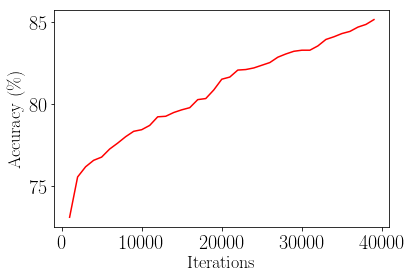

In [10]:
acc = []
iters_arr = []

for itr in range (1000, 40000, 1000): 
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=0.00005, max_iter=itr)
    y_pred = predict_y(X_train, coeff)
    acc.append((y_train == y_pred).mean() * 100)
    iters_arr.append(itr)
    
plt.plot(iters_arr, acc, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (\%)')

## Plot: Accuracy vs. #Iterations (on the test data)

Text(0,0.5,'Accuracy (\\%)')

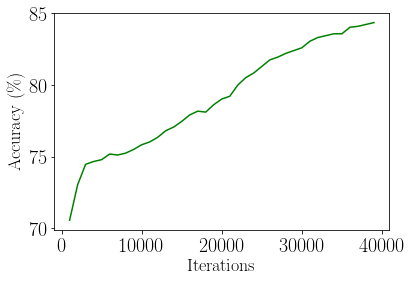

In [11]:
acc = []
iters_arr = []

for itr in range (1000, 40000, 1000): 
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=0.00005, max_iter=itr)
    y_pred = predict_y(X_test, coeff)
    acc.append((y_test == y_pred).mean() * 100)
    iters_arr.append(itr)
    
plt.plot(iters_arr, acc, 'g-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (\%)')

# (a)

## Plot: Accuracy vs. Learning Rate (on the training data)

In [28]:
def exp_range(start, end, mul):
    while start < end:
        yield start
        start *= mul

Text(0,0.5,'Accuracy (\\%)')

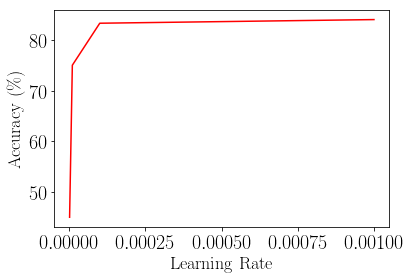

In [29]:
acc = []
lr = []

for learning_rate in exp_range(0.000001, 0.01, 10):
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=learning_rate, max_iter=10000)
    y_pred = predict_y(X_train, coeff)
    acc.append((y_train == y_pred).mean() * 100)
    lr.append(float(learning_rate))
    
plt.plot(lr, acc, 'r-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (\%)')

## Plot: Accuracy vs. Learning Rate (on the test data)

Text(0,0.5,'Accuracy (\\%)')

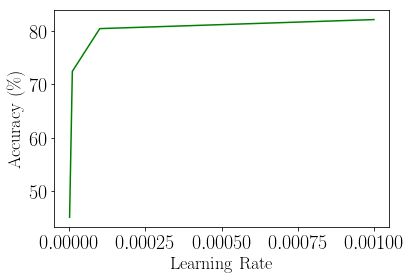

In [30]:
acc = []
lr = []

for learning_rate in exp_range(0.000001, 0.01, 10):
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=learning_rate, max_iter=10000)
    y_pred = predict_y(X_test, coeff)
    acc.append((y_test == y_pred).mean() * 100)
    lr.append(float(learning_rate))
    
plt.plot(lr, acc, 'g-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (\%)')

## Normalizing Data:

### We normalize column $c_i$ as follows:

### $normed~c_i = \frac{(~c_i - c_i.mean()~)}{c_i.std()}$

### Where $c_i.mean()$ is  the mean of column $c_i$ and $c_i.std()$ is the standard deviation.

In [31]:
def normalize (X):
    normalized_X = (X - X.mean()) / X.std()
    return X

In [32]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

X_train = fit_intercept(X_train)
X_test = fit_intercept(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train = X_train.rename(columns={x:y for x,y in zip(X_train.columns,X_train.columns)})
X_test = X_test.rename(columns={x:y for x,y in zip(X_test.columns,X_test.columns)})

In [33]:
X_train.columns
X_train = normalize(X_train)
X_test = normalize(X_test)

## Plot (on the normalized data): Accuracy vs. #Iterations (on the training data)

Text(0,0.5,'Accuracy (\\%)')

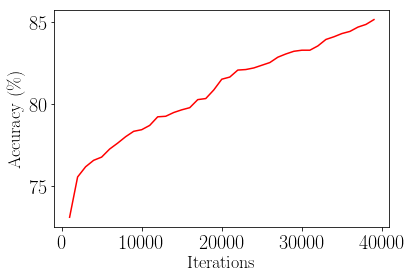

In [36]:
acc = []
iters_arr = []

for itr in range (1000, 40000, 1000): 
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=0.00005, max_iter=itr)
    y_pred = predict_y(X_train, coeff)
    acc.append((y_train == y_pred).mean() * 100)
    iters_arr.append(itr)
    
plt.plot(iters_arr, acc, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (\%)')

## Plot (on the normalized data): Accuracy vs. #Iterations (on the test data)

In [ ]:
acc = []
iters_arr = []

for itr in range (1000, 40000, 1000): 
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=0.00005, max_iter=itr)
    y_pred = predict_y(X_test, coeff)
    acc.append((y_test == y_pred).mean() * 100)
    iters_arr.append(itr)
    
plt.plot(iters_arr, acc, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (\%)')

# (b) 

## Plot on normalized data: Accuracy vs. Learning Rate (on the training data)

Text(0,0.5,'Accuracy (\\%)')

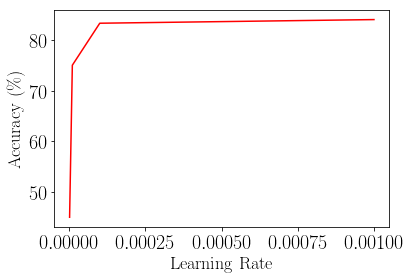

In [34]:
acc = []
lr = []

for learning_rate in exp_range(0.000001, 0.01, 10):
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=learning_rate, max_iter=10000)
    y_pred = predict_y(X_train, coeff)
    acc.append((y_train == y_pred).mean() * 100)
    lr.append(float(learning_rate))

plt.plot(lr, acc, 'r-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (\%)')

## Plot on normalized data: Accuracy vs. Learning Rate (on the test data)

Text(0,0.5,'Accuracy (\\%)')

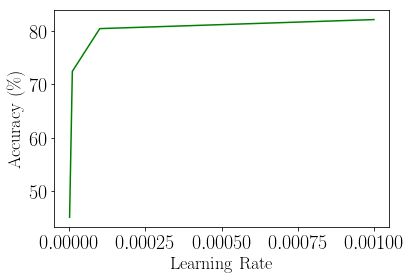

In [35]:
acc = []
iters_arr = []

for itr in range (1000, 40000, 1000): 
    coeff = logistic_reg_gradient_descent(X_train, y_train, 
                                          alpha=0.00005, max_iter=itr)
    y_pred = predict_y(X_train, coeff)
    acc.append((y_test == y_pred).mean() * 100)
    iters_arr.append(itr)
    
plt.plot(iters_arr, acc, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (\%)')